# ☀️ Tutorial de Matplotlib: Análisis de Datos Fotovoltaicos

**Objetivo:** Enseñar los fundamentos de Matplotlib (la biblioteca de visualización más popular de Python) utilizando datos simulados de un sistema fotovoltaico (PV).

**Contexto:** Vamos a simular la generación de energía de un pequeño parque solar durante 3 días con diferentes condiciones climáticas para aprender a comparar y analizar visualmente su rendimiento.

## Paso 1: Importar las Bibliotecas Necesarias

Primero, importamos las bibliotecas que usaremos:
* `matplotlib.pyplot` (con el alias `plt`): Es la interfaz principal para crear gráficos.
* `pandas` (con el alias `pd`): Para manejar nuestros datos y series temporales.
* `numpy` (con el alias `np`): Para cálculos numéricos y la simulación.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Esta "línea mágica" es específica de Jupyter y hace que los gráficos 
# aparezcan directamente en el notebook.
%matplotlib inline

## Paso 2: Simulación de Datos Fotovoltaicos

No necesitamos datos reales para aprender. Vamos a simular 3 días (72 horas) de datos.

Crearemos:
* **Índice de Tiempo:** 72 horas consecutivas.
* **Día 1: Soleado:** Una curva de irradiancia perfecta (como una campana) y una producción de energía ideal.
* **Día 2: Nublado:** Irradiancia general más baja y con mucho "ruido" (fluctuaciones).
* **Día 3: Parcialmente Nublado:** Un día mayormente soleado, pero con caídas bruscas (paso de nubes densas).

In [2]:
# 1. Crear el índice de tiempo (3 días = 72 horas)
timestamps = pd.date_range(start='2025-07-01', periods=72, freq='h')

# 2. Crear el ciclo base de sol (0 en la noche, pico al mediodía)
# Usamos una función seno para simular el ciclo día/noche en 24h
horas_dia = np.arange(0, 72)
ciclo_solar_base = np.sin(np.pi * (horas_dia % 24) / 24) ** 2
# Multiplicamos por una irradiancia máxima (ej. 1000 W/m^2) y quitamos valores negativos
irradiancia_base = np.maximum(0, ciclo_solar_base * 1000 + np.random.normal(0, 5, 72))

# 3. Simular los 3 días

# Día 1: Soleado (ideal)
irradiancia_dia1 = irradiancia_base
potencia_dia1 = irradiancia_dia1 * 0.15  # Asumimos una eficiencia/área del 15%

# Día 2: Nublado (menos sol, más ruido)
irradiancia_dia2 = irradiancia_base * 0.4 + np.random.normal(0, 20, 72)
irradiancia_dia2 = np.maximum(0, irradiancia_dia2) # No puede ser negativa
potencia_dia2 = irradiancia_dia2 * 0.15

# Día 3: Parcialmente Nublado (caídas bruscas)
irradiancia_dia3 = irradiancia_base
potencia_dia3 = irradiancia_dia3 * 0.15
# Simular el paso de nubes densas (ej. a las 11am y 2pm del 3er día)
potencia_dia3[24+11] *= 0.3
potencia_dia3[24+14] *= 0.4
potencia_dia3[24+15] *= 0.5

# 4. Crear el DataFrame de Pandas
df = pd.DataFrame(
    data={
        'Irradiancia_Dia1': irradiancia_dia1,
        'Potencia_Dia1': potencia_dia1,
        'Irradiancia_Dia2': irradiancia_dia2,
        'Potencia_Dia2': potencia_dia2,
        'Irradiancia_Dia3': irradiancia_dia3,
        'Potencia_Dia3': potencia_dia3
    },
    index=timestamps
)

# 5. Inspeccionar los datos
print("Primeras filas de nuestros datos simulados:")
df.head()

Primeras filas de nuestros datos simulados:


,Irradiancia_Dia1,Potencia_Dia1,Irradiancia_Dia2,Potencia_Dia2,Irradiancia_Dia3,Potencia_Dia3
2025-07-01 00:00:00,0.000000,0.000000,7.927486,1.189123,0.000000,0.000000
2025-07-01 01:00:00,17.933876,2.690081,0.000000,0.000000,17.933876,2.690081
2025-07-01 02:00:00,65.584431,9.837665,30.040184,4.506028,65.584431,9.837665
2025-07-01 03:00:00,143.005079,21.450762,62.040427,9.306064,143.005079,21.450762
2025-07-01 04:00:00,256.301550,38.445233,83.298468,12.494770,256.301550,38.445233


## Lección 1: Nuestro Primer Gráfico (plt.plot)

La forma más simple de graficar es usar `plt.plot()`.
Vamos a graficar la potencia del Día 1 (Soleado).

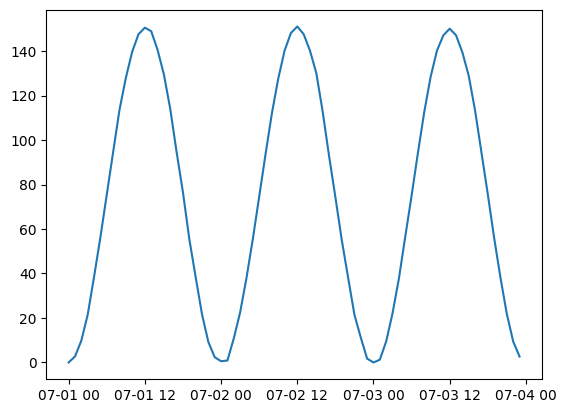

In [3]:
# El gráfico más simple posible
# Matplotlib toma automáticamente el índice (la fecha) como eje X
# y la columna que le damos como eje Y.
plt.plot(df['Potencia_Dia1'])

# Mostramos el gráfico
plt.show()

**Análisis de la Lección 1:**

¡Funciona! Pero este gráfico es muy básico. No tiene títulos, no sabemos qué significan los ejes y se ve pequeño.

## Lección 2: Mejorando el Gráfico (Títulos, Etiquetas y Tamaño)

Vamos a hacer el mismo gráfico, pero añadiendo contexto. Usaremos:
* `plt.figure(figsize=(ancho, alto))` para definir el tamaño.
* `plt.title()` para el título principal.
* `plt.xlabel()` para la etiqueta del eje X.
* `plt.ylabel()` para la etiqueta del eje Y.
* `plt.grid(True)` para añadir una cuadrícula.

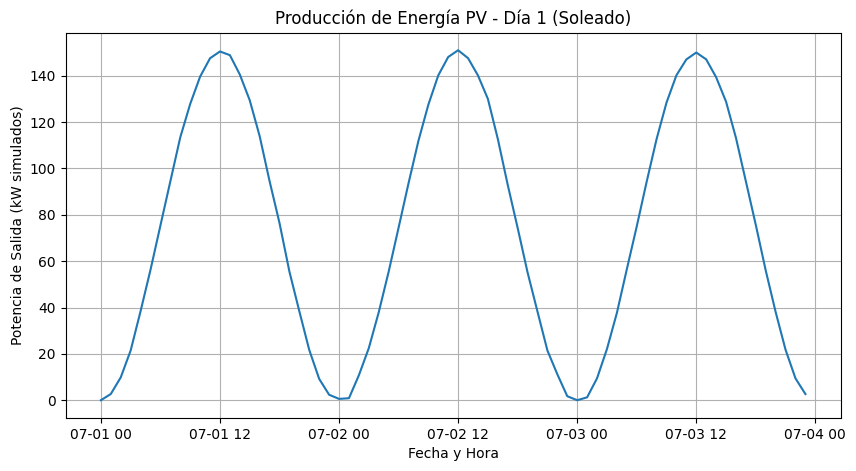

In [4]:
# 1. Definir el tamaño de la figura (ej. 10 pulgadas de ancho, 5 de alto)
plt.figure(figsize=(10, 5))

# 2. Graficar los datos (X = índice del df, Y = Potencia_Dia1)
plt.plot(df.index, df['Potencia_Dia1'])

# 3. Añadir títulos y etiquetas
plt.title('Producción de Energía PV - Día 1 (Soleado)')
plt.xlabel('Fecha y Hora')
plt.ylabel('Potencia de Salida (kW simulados)')

# 4. Añadir una cuadrícula para facilitar la lectura
plt.grid(True)

# 5. Mostrar el gráfico
plt.show()

## Lección 3: Comparando los 3 Días (Múltiples Líneas y Leyenda)

El verdadero poder de la visualización es la **comparación**.

Podemos graficar múltiples líneas en el mismo gráfico llamando a `plt.plot()` varias veces. Para saber qué línea es cuál, añadimos una etiqueta (`label`) a cada una y luego llamamos a `plt.legend()`.

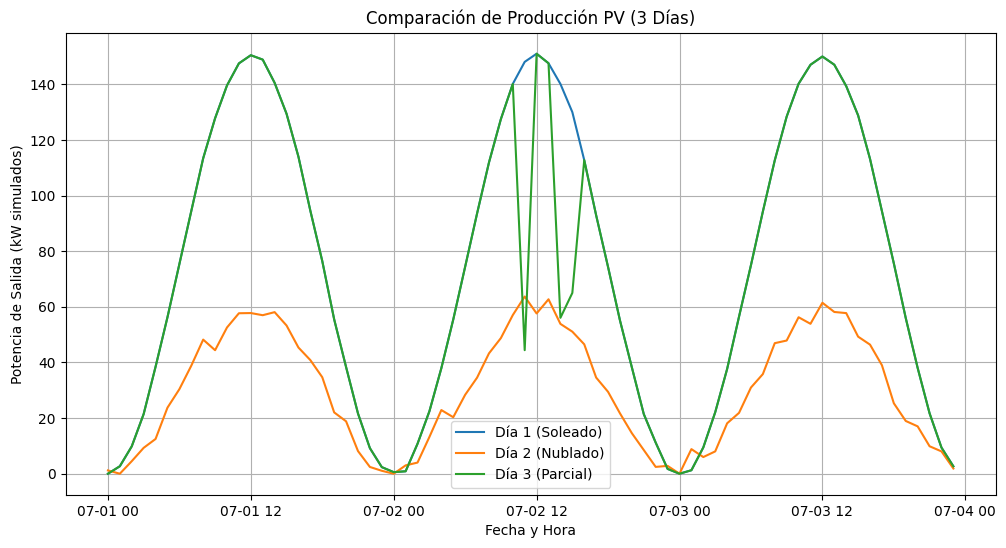

In [5]:
# 1. Definir el tamaño
plt.figure(figsize=(12, 6))

# 2. Graficar las 3 líneas. Añadimos el parámetro 'label' en cada una.
plt.plot(df.index, df['Potencia_Dia1'], label='Día 1 (Soleado)')
plt.plot(df.index, df['Potencia_Dia2'], label='Día 2 (Nublado)')
plt.plot(df.index, df['Potencia_Dia3'], label='Día 3 (Parcial)')

# 3. Añadir títulos y etiquetas
plt.title('Comparación de Producción PV (3 Días)')
plt.xlabel('Fecha y Hora')
plt.ylabel('Potencia de Salida (kW simulados)')

# 4. Añadir la leyenda (¡clave para la comparación!)
plt.legend()

# 5. Cuadrícula
plt.grid(True)

# 6. Mostrar el gráfico
plt.show()

**Análisis de la Lección 3:**

¡Genial! Ahora podemos sacar conclusiones:
* El **Día 1 (azul)** es nuestro escenario ideal.
* El **Día 2 (naranja)** tuvo una producción mucho menor y muy errática (mira el ruido), lo que es típico de un día muy nublado.
* El **Día 3 (verde)** fue casi tan bueno como el Día 1, pero tuvo caídas de potencia muy fuertes en las horas pico (mira las caídas a las 11:00 y 14:00 del 2 de julio). Esto indica el paso de nubes densas.

## Lección 4: El Enfoque Orientado a Objetos (plt.subplots)

La forma anterior (`plt.plot`, `plt.title`, etc.) es rápida y fácil. Pero para gráficos más complejos o profesionales, se recomienda el **enfoque orientado a objetos (OO)**.

La idea es simple: en lugar de llamar a `plt.loquesea()`, primero creamos nuestros "lienzos":
`fig, ax = plt.subplots()`

* `fig`: Es la figura completa (el contenedor, la ventana).
* `ax`: Son los ejes (el gráfico en sí donde dibujamos).

Casi todos los comandos cambian de `plt.comando()` a `ax.set_comando()` (¡nota el `set_`!).

| Método Rápido (plt) | Método OO (ax) |
| :--- | :--- |
| `plt.title()` | `ax.set_title()` |
| `plt.xlabel()` | `ax.set_xlabel()` |
| `plt.ylabel()` | `ax.set_ylabel()` |
| `plt.plot()` | `ax.plot()` (¡este no cambia!)|
| `plt.legend()` | `ax.legend()` (¡este no cambia!)|
| `plt.grid()` | `ax.grid()` (¡este no cambia!)|

Vamos a rehacer el gráfico de la Lección 3 usando este método.

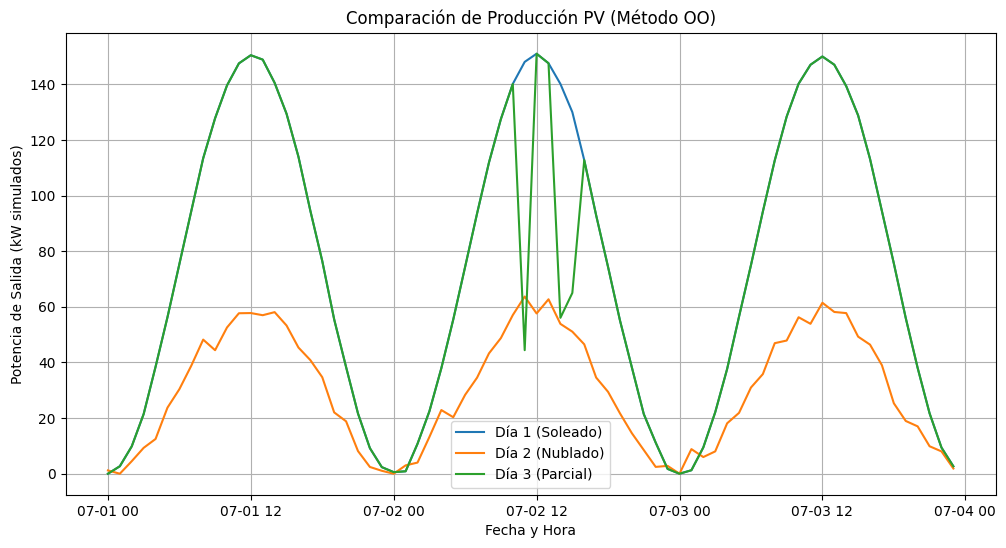

In [6]:
# 1. Crear la Figura (fig) y los Ejes (ax)
# Pasamos el figsize directamente a subplots
fig, ax = plt.subplots(figsize=(12, 6))

# 2. Dibujar sobre los ejes (ax)
ax.plot(df.index, df['Potencia_Dia1'], label='Día 1 (Soleado)')
ax.plot(df.index, df['Potencia_Dia2'], label='Día 2 (Nublado)')
ax.plot(df.index, df['Potencia_Dia3'], label='Día 3 (Parcial)')

# 3. Configurar los títulos y etiquetas usando 'set_'
ax.set_title('Comparación de Producción PV (Método OO)')
ax.set_xlabel('Fecha y Hora')
ax.set_ylabel('Potencia de Salida (kW simulados)')

# 4. Añadir leyenda y cuadrícula (sin 'set_')
ax.legend()
ax.grid(True)

# 5. Mostrar el gráfico
plt.show()

## Lección 5: Subplots (Gráficos Múltiples)

El verdadero poder del método OO (`plt.subplots`) es crear múltiples gráficos en una sola figura.

Si queremos comparar los 3 días, pero uno al lado del otro (o uno encima del otro) en lugar de superpuestos, podemos hacerlo.

Usamos `plt.subplots(nrows=3, ncols=1)` para pedir 3 filas y 1 columna.
Ahora, `ax` no será un solo eje, sino un **array (lista) de ejes**. Accedemos a ellos por su índice (ej. `ax[0]`, `ax[1]`).

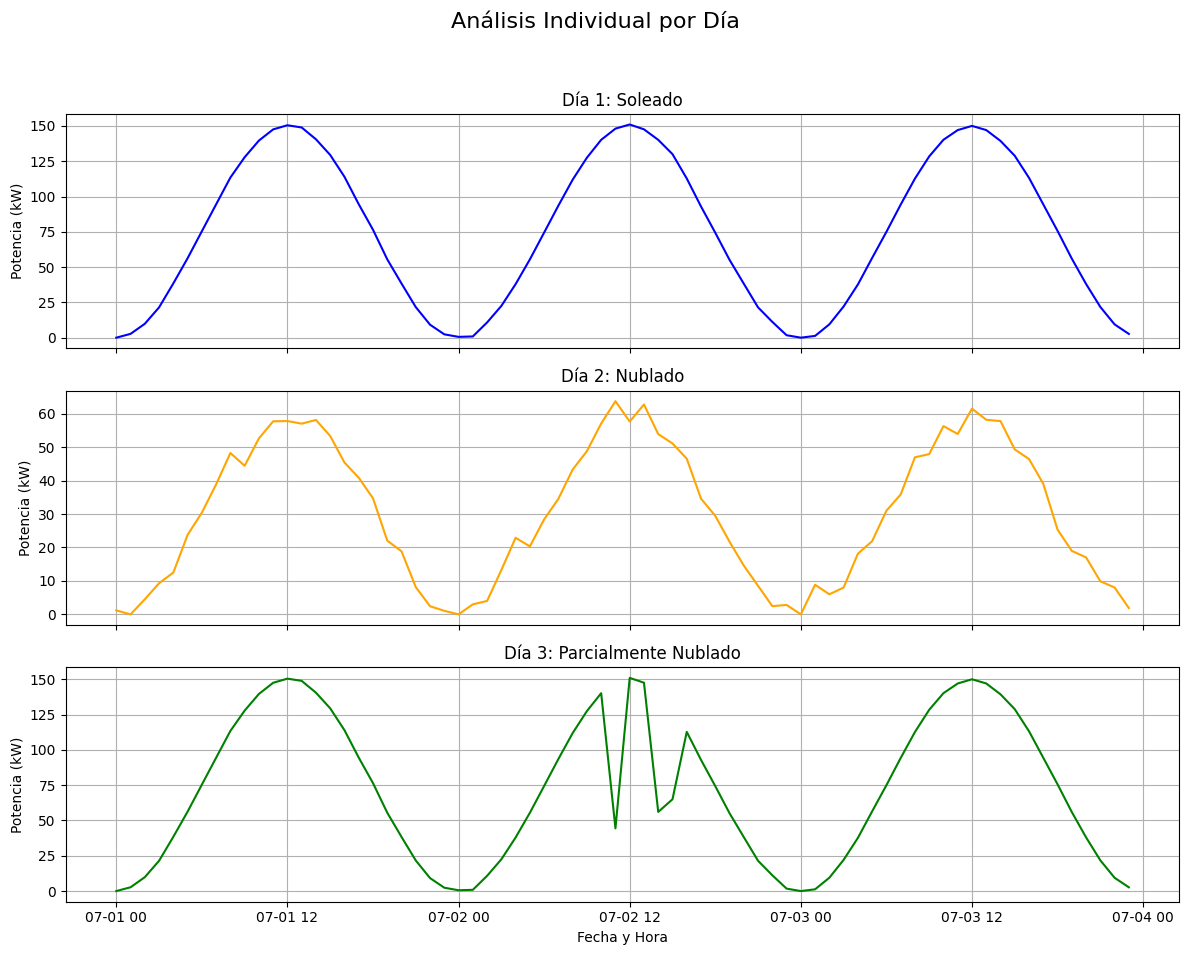

In [7]:
# 1. Pedimos 3 filas, 1 columna. 
# sharex=True hace que todos compartan el mismo eje X (más limpio)
# figsize ahora debe ser más alto para acomodar 3 gráficos
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10), sharex=True)

# 'axes' es ahora una lista con 3 elementos: axes[0], axes[1], axes[2]

# Gráfico 1: Día Soleado (en el primer eje)
axes[0].plot(df.index, df['Potencia_Dia1'], color='blue')
axes[0].set_title('Día 1: Soleado')
axes[0].set_ylabel('Potencia (kW)')
axes[0].grid(True)

# Gráfico 2: Día Nublado (en el segundo eje)
axes[1].plot(df.index, df['Potencia_Dia2'], color='orange')
axes[1].set_title('Día 2: Nublado')
axes[1].set_ylabel('Potencia (kW)')
axes[1].grid(True)

# Gráfico 3: Día Parcial (en el tercer eje)
axes[2].plot(df.index, df['Potencia_Dia3'], color='green')
axes[2].set_title('Día 3: Parcialmente Nublado')
axes[2].set_ylabel('Potencia (kW)')
axes[2].set_xlabel('Fecha y Hora') # Solo ponemos la etiqueta X en el último
axes[2].grid(True)

# 5. Añadir un título general a toda la figura
fig.suptitle('Análisis Individual por Día', fontsize=16)

# 6. Ajustar el espaciado para que no se superpongan los títulos
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # [left, bottom, right, top]

# 7. Mostrar
plt.show()

## Lección 6: Otros Tipos de Gráficos (Histograma y Scatter)

Matplotlib no es solo para líneas. Dos tipos de gráficos muy útiles en ciencia de datos son:

1.  **Histograma (`ax.hist()`):** Muestra la *distribución* de los datos. ¿Qué valores de potencia son los más comunes?
2.  **Gráfico de Dispersión (`ax.scatter()`):** Muestra la *relación* entre dos variables. ¿Cómo se relaciona la Irradiancia con la Potencia?

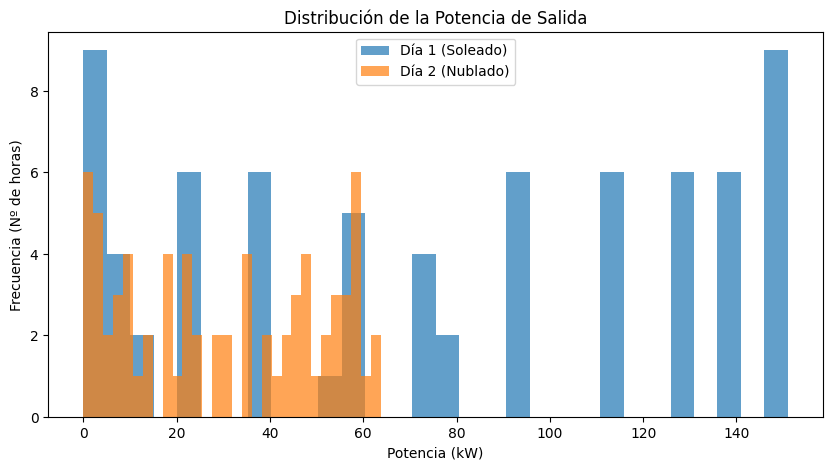

In [8]:
# ----- Gráfico 1: Histograma de Potencia -----
# ¿Cuáles son los valores de potencia más frecuentes?

fig, ax = plt.subplots(figsize=(10, 5))

# Usamos alpha=0.7 para hacer los colores semitransparentes
ax.hist(df['Potencia_Dia1'], bins=30, alpha=0.7, label='Día 1 (Soleado)')
ax.hist(df['Potencia_Dia2'], bins=30, alpha=0.7, label='Día 2 (Nublado)')

ax.set_title('Distribución de la Potencia de Salida')
ax.set_xlabel('Potencia (kW)')
ax.set_ylabel('Frecuencia (Nº de horas)')
ax.legend()
plt.show()

# Análisis del Histograma:
# Día 1 (Azul): Tiene dos picos claros. Uno grande en 0 kW (la noche) y 
# otro pico en los valores altos (el día soleado).
# Día 2 (Naranja): También tiene un pico en 0 kW (la noche), pero el resto 
# de valores están mucho más esparcidos y bajos, sin un pico diurno claro.

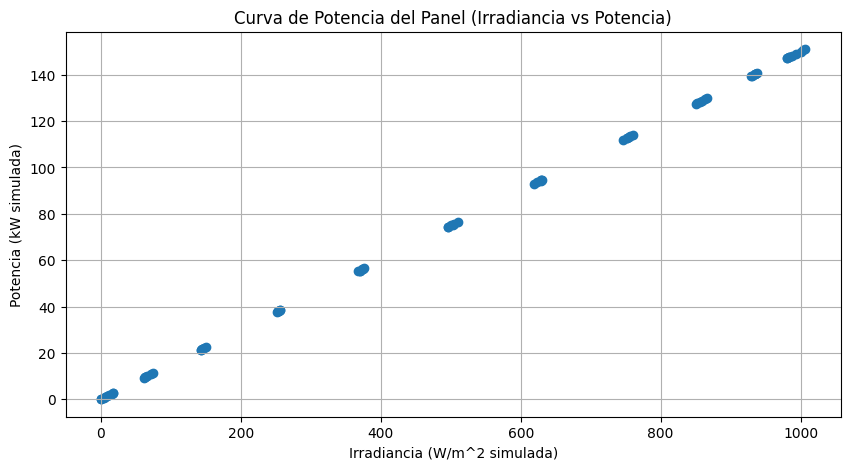

In [9]:
# ----- Gráfico 2: Gráfico de Dispersión (Scatter Plot) -----
# ¿Cómo se relaciona la irradiancia con la potencia? (Curva de potencia)

fig, ax = plt.subplots(figsize=(10, 5))

# Eje X = Irradiancia, Eje Y = Potencia. 
# Usamos los datos del Día 1 (el más limpio)
ax.scatter(df['Irradiancia_Dia1'], df['Potencia_Dia1'])

ax.set_title('Curva de Potencia del Panel (Irradiancia vs Potencia)')
ax.set_xlabel('Irradiancia (W/m^2 simulada)')
ax.set_ylabel('Potencia (kW simulada)')
ax.grid(True)
plt.show()

# Análisis del Scatter Plot:
# Vemos una relación lineal casi perfecta. A más irradiancia (sol), 
# más potencia produce el panel. El punto en (0,0) es la noche.

## Lección 7: Estilizando el Gráfico (Estilos, Colores y Marcadores)

Podemos cambiar la apariencia de nuestros gráficos muy fácilmente.

* `plt.style.use('estilo')`: Cambia el estilo de todos los gráficos que vengan después. (Ej: 'ggplot', 'seaborn', 'fivethirtyeight').
* `color=' '`: Define el color de la línea.
* `linestyle=' '`: Define el estilo de línea ('-' sólido, '--' discontinuo, ':' punteado).
* `marker=' '`: Añade un marcador en cada punto de dato ('o', 'x', '+', 's').

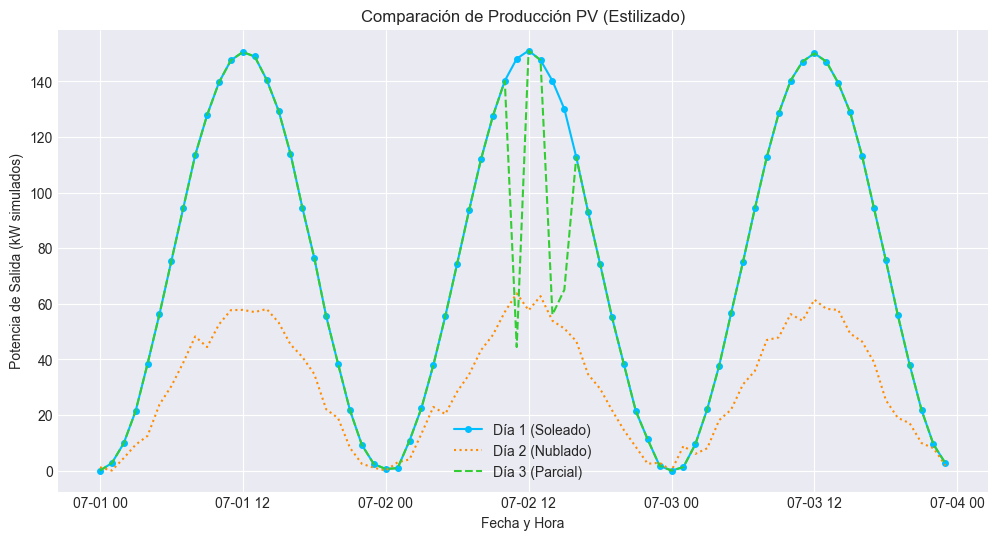

In [10]:
# 1. Usar un estilo predefinido (¡descomenta uno para probar!)
# plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
plt.style.use('seaborn-v0_8-darkgrid')

# 2. Recreamos el gráfico de la Lección 4 con estilos personalizados
fig, ax = plt.subplots(figsize=(12, 6))

# Día 1: Línea sólida, azul, con marcadores de círculo pequeños
ax.plot(df.index, df['Potencia_Dia1'], 
        label='Día 1 (Soleado)', 
        color='deepskyblue', 
        linestyle='-', 
        marker='o', 
        markersize=4)

# Día 2: Línea punteada, color 'darkorange'
ax.plot(df.index, df['Potencia_Dia2'], 
        label='Día 2 (Nublado)', 
        color='darkorange', 
        linestyle=':')

# Día 3: Línea discontinua, color 'green'
ax.plot(df.index, df['Potencia_Dia3'], 
        label='Día 3 (Parcial)', 
        color='limegreen', 
        linestyle='--')

# 3. Configurar títulos, etiquetas y leyenda
ax.set_title('Comparación de Producción PV (Estilizado)')
ax.set_xlabel('Fecha y Hora')
ax.set_ylabel('Potencia de Salida (kW simulados)')
ax.legend()

# 4. Mostrar el gráfico
plt.show()

# 5. Volver al estilo por defecto para el resto del notebook (opcional)
plt.style.use('default')

## Conclusión y Próximos Pasos

¡Felicidades! Has aprendido:

1.  A crear gráficos de líneas simples (`plt.plot`).
2.  A añadir elementos esenciales como **títulos**, **etiquetas** y **leyendas**.
3.  A comparar múltiples series de datos en un solo gráfico.
4.  El **método Orientado a Objetos** (`fig, ax = plt.subplots()`), que es el estándar profesional.
5.  A crear **subplots** (múltiples gráficos en una cuadrícula).
6.  A usar otros tipos de gráficos como **histogramas** (para ver distribución) y **scatter plots** (para ver relaciones).
7.  A **estilizar** tus gráficos con colores, estilos de línea y marcadores.

**Desafío:** Intenta crear un gráfico que muestre la *eficiencia* (Potencia / Irradiancia) a lo largo del día. ¿Es constante? (¡Asegúrate de evitar la división por cero durante la noche!).